In [23]:
import sys 
sys.path.append('../helper/')
%run matplotlib_setup.ipy
%run helper.ipy
from types import SimpleNamespace

from ipywidgets import interact
import matplotlib
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import numpy as np
import scipy.linalg as la 
from Zak_compute import zak_bands

import kwant
from kwant.wraparound import wraparound, plot_2d_bands

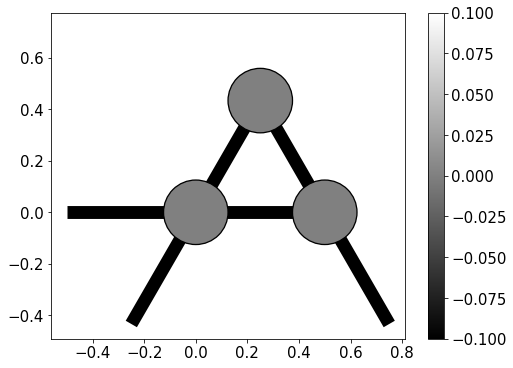

In [35]:
kag_lat = kwant.lattice.kagome(norbs=1)
kagome = kwant.Builder(kwant.TranslationalSymmetry(*kag_lat.prim_vecs))
kagome[kag_lat.shape((lambda pos: True), (0, 0))] = 0
kagome[kag_lat.neighbors(1)] = 1
kwant.plot(kagome,site_color=family_color,site_lw=0.01)
n_basis = len(kagome.sites())
kagome = wraparound(kagome).finalized()
#dispersion_2D(kag_lat,kagome)
#import kwant.qsymm 
#kwant.qsymm.find_builder_symmetries(kagome)

In [37]:
a1,a2 = kag_lat.prim_vecs
act_pos = np.array([kagome.pos(i) for i in range(n_basis)])
red_pos = np.matmul(act_pos,la.inv([a1,a2]))
h = kagome.hamiltonian_submatrix

In [38]:
import z2pack
from Z2_compute import zak_bands as zak_bands_z2

#ham_k=zak_bands_z2(kagome,momenta=1001,dim=2)
z2_system = z2pack.hm.System(h,dim=2,pos=red_pos,
                                 convention=1)

result = z2pack.surface.run(system=z2_system, 
                            surface=lambda t1,t2: [t1,t2],
                            pos_tol=1e-4,
                            iterator=range(2,500,2));

print("Z2invariant:",z2pack.invariant.z2(result))
print("Chern number:",z2pack.invariant.z2(result))


+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2019-06-26 00:12:27,094                                |
|   running Z2Pack version 2.1.1                                       |
|                                                                      |
|   gap_tol:            0.3                                            |
|   init_result:        None                                           |
|   iterator:           range(2, 500, 2)                               |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.01                                           |
|   move_tol:           0.3                       

/home/hyda/.local/lib/python3.6/site-packages/z2pack/hm.py:58: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  size = len(self._hamilton([0] * dim))  # assuming to be square...
INFO:z2pack.surface:{'serializer': 'auto', 'load_quiet': True, 'load': False, 'save_file': None, 'init_result': None, 'iterator': range(2, 500, 2), 'min_neighbour_dist': 0.01, 'num_lines': 11, 'move_tol': 0.3, 'gap_tol': 0.3, 'pos_tol': 0.0001, 'surface': <function <lambda> at 0x7fdce6077730>, 'system': <z2pack.hm.System object at 0x7fdce61e1358>}


INFO: Adding lines required by 'num_lines'.


INFO:z2pack.surface:Adding lines required by 'num_lines'.


INFO: Adding line at t = 0.0


INFO:z2pack.surface:Adding line at t = 0.0


INFO:       Calculating line for N = 2


INFO:z2pack.line:Calculating line for N = 2


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
z2_system = z2pack.hm.System(h,dim=2,pos=red_pos,bands=3,
                                 convention=2)

result_line = z2pack.surface.run(system=z2_system, 
                        surface=lambda t1: t1,
                        pos_tol=1e-4);
                        #iterator=range(200,500,2));

print("WCC: \n",result_line.wcc)
print("Polarization: \n",result_line.pol)


+----------------------------------------------------------------------+
|   ===================                                                |
|   SURFACE CALCULATION                                                |
|   ===================                                                |
|   starting at 2019-06-26 00:13:38,748                                |
|   running Z2Pack version 2.1.1                                       |
|                                                                      |
|   gap_tol:            0.3                                            |
|   init_result:        None                                           |
|   iterator:           range(8, 27, 2)                                |
|   load:               False                                          |
|   load_quiet:         True                                           |
|   min_neighbour_dist: 0.01                                           |
|   move_tol:           0.3                       

INFO:z2pack.surface:{'serializer': 'auto', 'load_quiet': True, 'load': False, 'save_file': None, 'init_result': None, 'iterator': range(8, 27, 2), 'min_neighbour_dist': 0.01, 'num_lines': 11, 'move_tol': 0.3, 'gap_tol': 0.3, 'pos_tol': 0.0001, 'surface': <function <lambda> at 0x7fdce5fa3d90>, 'system': <z2pack.hm.System object at 0x7fdce61e2e80>}


INFO: Adding lines required by 'num_lines'.


INFO:z2pack.surface:Adding lines required by 'num_lines'.


INFO: Adding line at t = 0.0


INFO:z2pack.surface:Adding line at t = 0.0


TypeError: <lambda>() takes 1 positional argument but 2 were given